In [1]:
import torch
from torch import nn
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

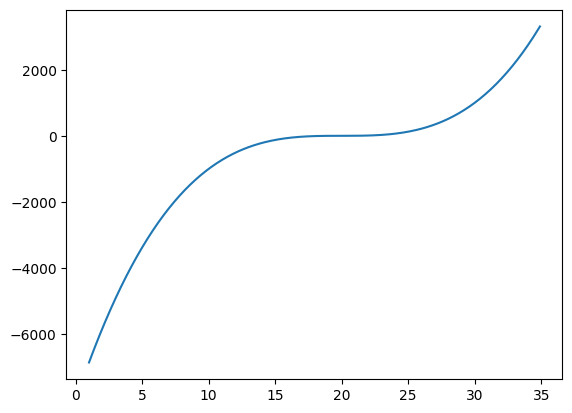

In [176]:
x_data = np.arange(1, 35, 0.1)
# y_data = np.sin(0.2*x_data)
y_data = (x_data-20)**3 +0.01*(x_data-20) + 1
x_data = torch.tensor(x_data, dtype=torch.float)
y_data = torch.tensor(y_data, dtype=torch.float)
plt.plot(x_data, y_data)

In [205]:
class Simple_Sin(nn.Module):
    def __init__(self, inf, ouf, hidden):
        super().__init__()
        self.l1 = nn.Linear(inf, hidden)
        self.l2 = nn.Linear(hidden, ouf)
        self.relu = nn.ReLU()

    def forward(self, x):
        x_out = self.l1(x)
        x_out = self.relu(x_out)
        x_out = self.l2(x_out)
        out = (x-20)**3 +x_out*(x-20) + 1
        return out

  0%|          | 0/40 [00:00<?, ?it/s]

c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


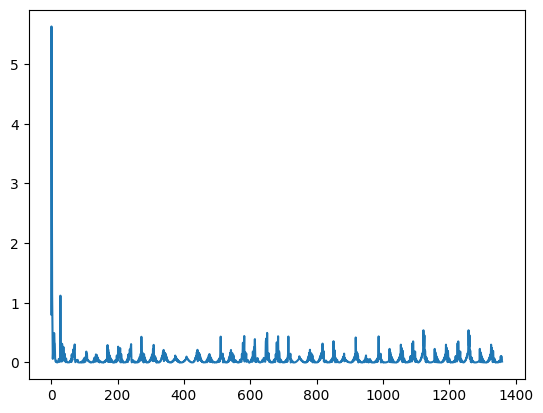

In [206]:
model = Simple_Sin(1, 1, 32)
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
loss_fn = nn.L1Loss()
epochs = 40
loss_list = []

for _ in tqdm(range(epochs)):
    i = 0
    for x, y in zip(x_data, y_data):
        i += 1
        x = x.unsqueeze(0)
        y_logit = model(x)
        loss = loss_fn(y_logit, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i%10 == 0:
            # print(f"Train loss is:{loss.item()}")
            loss_list.append(loss.item())

plt.plot(range(len(loss_list)), loss_list)


350 350
tensor([-7993.1528])
tensor(0.)


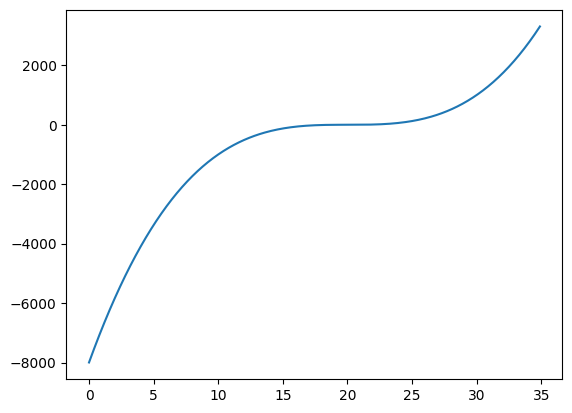

In [207]:
x_data2 = np.arange(0, 35, 0.1)
# y_data2 = np.sin(0.2*x_data2)
y_data2 = (x_data2-20)**3 +0.01*(x_data2-20) + 1
plt.plot(x_data2, y_data2)
x_data2 = torch.tensor(x_data2, dtype=torch.float)
y_data2 = torch.tensor(y_data2, dtype=torch.float)
y_logit = []
with torch.inference_mode():
    for x, y in zip(x_data2, y_data2):
        x = x.unsqueeze(0)
        y_logit.append(model(x))

print(len(x_data2), len(y_logit))
print(y_logit[0])
print(x_data2[0])

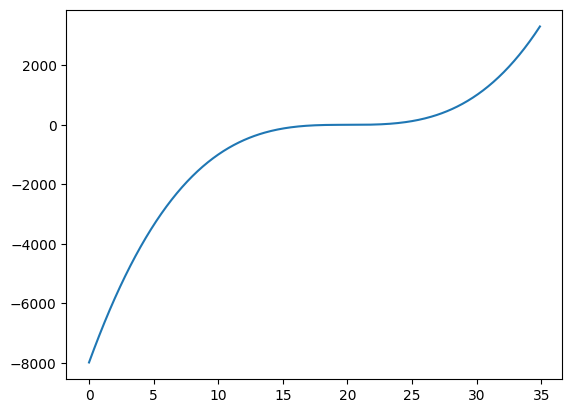

In [208]:
plt.plot(x_data2, y_logit)

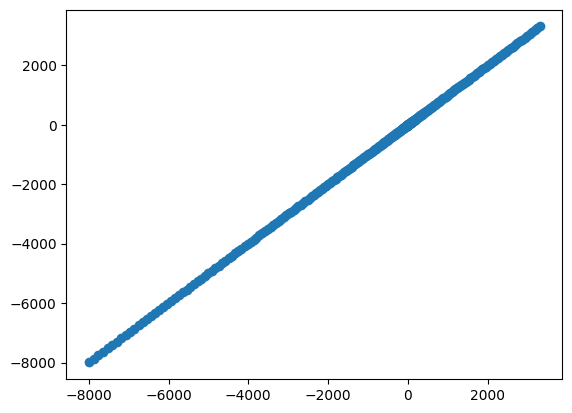

In [209]:
plt.scatter(y_logit, y_data2)

